## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [56]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [57]:
train, test = keras.datasets.cifar10.load_data()

In [58]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [59]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

layer = 3

In [60]:
from keras.layers import Dropout
"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.3):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [61]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.3, 0.5, 0.8]

In [62]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for DE in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=DE)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(DE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 7s 133us/step - loss: 1.4767 - acc: 0.4714 - val_loss: 1.4324 - val_acc: 0.4896
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4799 - acc: 0.4703 - val_loss: 1.4555 - val_acc: 0.4796
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
________

Epoch 48/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5709 - acc: 0.4334 - val_loss: 1.5282 - val_acc: 0.4567
Epoch 49/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.5780 - acc: 0.4278 - val_loss: 1.5198 - val_acc: 0.4595
Epoch 50/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5678 - acc: 0.4335 - val_loss: 1.4965 - val_acc: 0.4656
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               

50000/50000 [==============================] - 7s 132us/step - loss: 1.9588 - acc: 0.2609 - val_loss: 2.1182 - val_acc: 0.2281
Epoch 47/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.9626 - acc: 0.2590 - val_loss: 2.0624 - val_acc: 0.2551
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9549 - acc: 0.2641 - val_loss: 2.0424 - val_acc: 0.2577
Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9582 - acc: 0.2617 - val_loss: 2.1055 - val_acc: 0.2378
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.9600 - acc: 0.2592 - val_loss: 2.0645 - val_acc: 0.2316


W0718 21:13:18.101609 4672013760 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 21:13:18.126725 4672013760 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 21:13:18.148808 4672013760 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 6s 127us/step - loss: 2.3027 - acc: 0.0983 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3027 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000


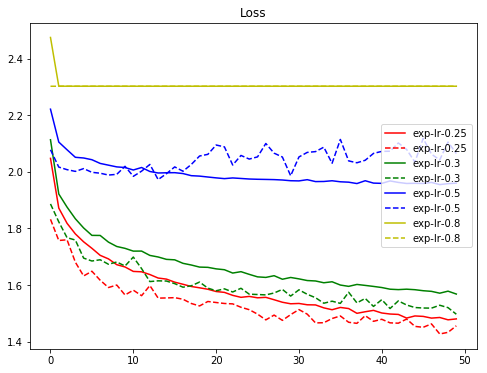

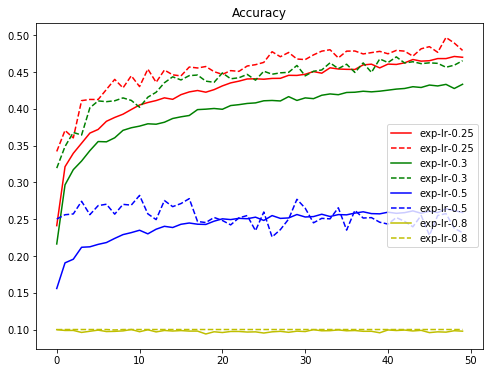

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

layer = 4

In [64]:
from keras.layers import Dropout
"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64], drp_ratio=0.5):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [32]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.3, 0.5, 0.8]

In [65]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for DE in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with DE = %.6f" % (DE))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=DE)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-DE-%s" % str(DE)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with DE = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)      

50000/50000 [==============================] - 7s 139us/step - loss: 1.5576 - acc: 0.4427 - val_loss: 1.4856 - val_acc: 0.4757
Epoch 48/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5545 - acc: 0.4451 - val_loss: 1.4926 - val_acc: 0.4692
Epoch 49/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5535 - acc: 0.4424 - val_loss: 1.4916 - val_acc: 0.4707
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5482 - acc: 0.4474 - val_loss: 1.5216 - val_acc: 0.4675
Experiment with DE = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (

50000/50000 [==============================] - 7s 139us/step - loss: 1.6646 - acc: 0.4013 - val_loss: 1.6184 - val_acc: 0.4277
Epoch 44/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6613 - acc: 0.4058 - val_loss: 1.6033 - val_acc: 0.4372
Epoch 45/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6612 - acc: 0.4038 - val_loss: 1.6012 - val_acc: 0.4394
Epoch 46/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6626 - acc: 0.4073 - val_loss: 1.6101 - val_acc: 0.4287
Epoch 47/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6546 - acc: 0.4078 - val_loss: 1.5943 - val_acc: 0.4427
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6582 - acc: 0.4081 - val_loss: 1.6086 - val_acc: 0.4431
Epoch 49/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6530 - acc: 0.4077 - val_loss: 1.6112 - val_acc: 0.4335
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 7s 135us/step - loss: 2.0164 - acc: 0.2255 - val_loss: 2.0822 - val_acc: 0.2198
Epoch 40/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0151 - acc: 0.2247 - val_loss: 2.0793 - val_acc: 0.2188
Epoch 41/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0203 - acc: 0.2218 - val_loss: 2.0969 - val_acc: 0.2216
Epoch 42/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0130 - acc: 0.2245 - val_loss: 2.0607 - val_acc: 0.2257
Epoch 43/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.0094 - acc: 0.2266 - val_loss: 2.1127 - val_acc: 0.2020
Epoch 44/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.0089 - acc: 0.2255 - val_loss: 2.0567 - val_acc: 0.2263
Epoch 45/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.0135 - acc: 0.2262 - val_loss: 2.0834 - val_acc: 0.2151
Epoch 46/50
50000/50000 [==============

W0718 21:42:33.284220 4672013760 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0718 21:42:33.307429 4672013760 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Experiment with DE = 0.800000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)      

50000/50000 [==============================] - 7s 133us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.3027 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3026 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000


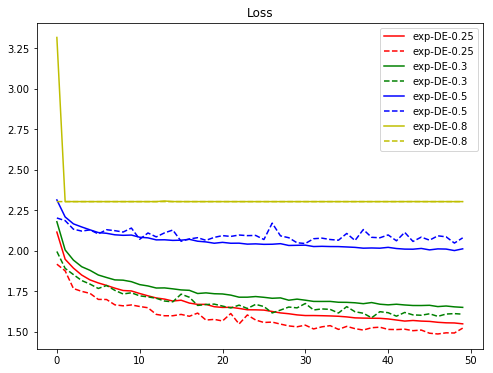

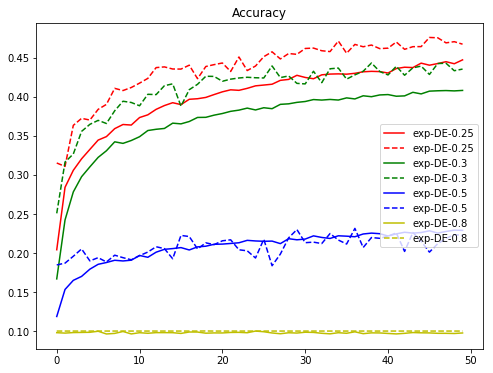

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

層數增加 正確率下降